In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file_name = 'length_data.csv'
df = pd.read_csv(file_name)
df["L1"] = df.L1_raw * df.map_distance/df.measurement_distance
df["L2"] = df.L2_raw * df.map_distance/df.measurement_distance

In [7]:
df[["subduction_zone_segment","L1", "L2"]]

,subduction_zone_segment,L1,L2
0,Nankai,109.090909,277.389277
1,Nankai,277.389277,250.349650
2,Nankai,250.349650,97.902098
3,Nankai,97.902098,103.962704
4,Japan_trench,18.110750,14.615000
5,Japan_trench,14.615000,10.783500
6,Japan_trench,10.783500,2.370000
7,Japan_trench,2.370000,3.673500
8,Japan_trench,3.673500,5.826250
9,Japan_trench,5.826250,5.964500


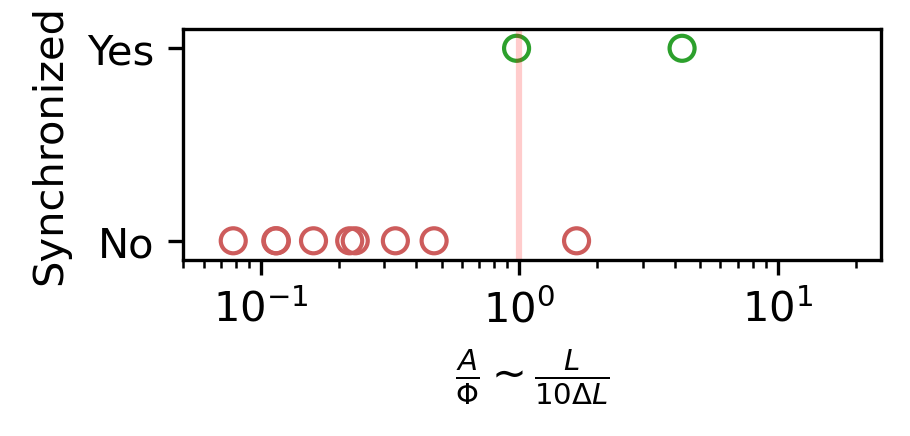

In [9]:
fig, ax = plt.subplots(figsize=(3, 1), dpi=300)

ax.scatter(
    1/(np.abs(df.L1 - df.L2) / df[["L1", "L2"]].mean(axis=1) / 0.1).loc[df.sync == 1],
    df.sync.loc[df.sync == 1],
    edgecolor="tab:green",
    facecolor="none",
    marker="o",
)
ax.scatter(
    1/(np.abs(df.L1 - df.L2) / df[["L1", "L2"]].mean(axis=1) / 0.1).loc[df.sync == 0],
    df.sync.loc[df.sync == 0],
    edgecolor="indianred",
    facecolor="none",
    marker="o",
)
ax.set(
    xscale="log",
    ylabel="Synchronized",
    xlabel=r"$\frac{A}{\Phi} \sim \frac{L}{10\Delta L}$",
    yticks=[0, 1],
    yticklabels=["No", "Yes"],
    ylim=[-0.1,1.1], 
    xlim=[0.05,25]
)

ax.axvline(1, color="red", alpha=0.2)
fig.savefig("figures/subduction_zone_sync.pdf", bbox_inches="tight")